# Gerardo de Miguel González

## Práctica 6 de Estadística para Data Science

### Problema 1 

*El tiempo de curación medio de un resfriado común es de 6.7 días. Un determinado producto homeopático pretende reducir el tiempo de curación del resfriado común. Se administra el medicamento a 20 personas y se anotan los tiempos de curación que figuran en el archivo days.txt.*

**::GMG::** Apuntes básicos de estadística (pdf) *Capítulo 6 Test de hipótesis*, pp. 39-41

In [1]:
#::GMG::Leemos el dataset
tiempos <- read.csv('days.txt', header=F)
str(tiempos)

'data.frame':	20 obs. of  1 variable:
 $ V1: num  4.2 8 9.4 5.7 5.8 3.6 6.4 5.3 8.2 6.5 ...


In [2]:
colnames(tiempos) <- c('días')
str(tiempos)

'data.frame':	20 obs. of  1 variable:
 $ días: num  4.2 8 9.4 5.7 5.8 3.6 6.4 5.3 8.2 6.5 ...


i) Representa los datos y el valor de referencia.

**::GMG::** Apuntes de estadística básica (pdf) *2.2. Representación gráfica*, pp. 8-9

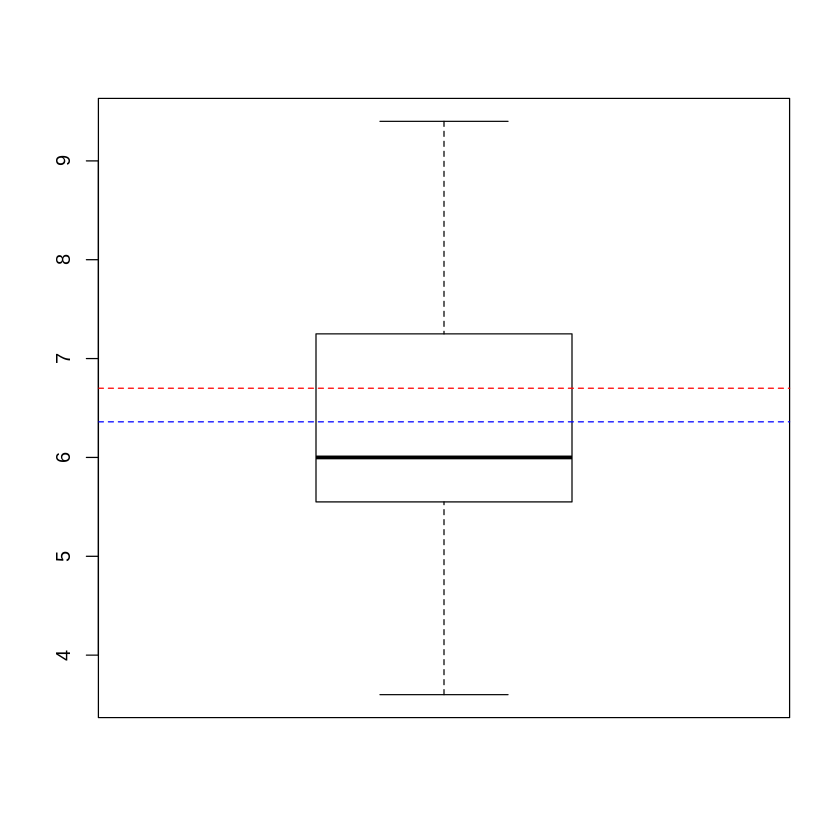

In [25]:
#::GMG::Creo que lo mejor en un boxplot con una línea que represente la media poblacional
#       y otra la media de la muestra
mu <- 6.7
boxplot(x = tiempos)
abline(h = mu, col = 'red', lty = 2)
abline(h = mean(tiempos$días), col = 'blue', lty = 2)

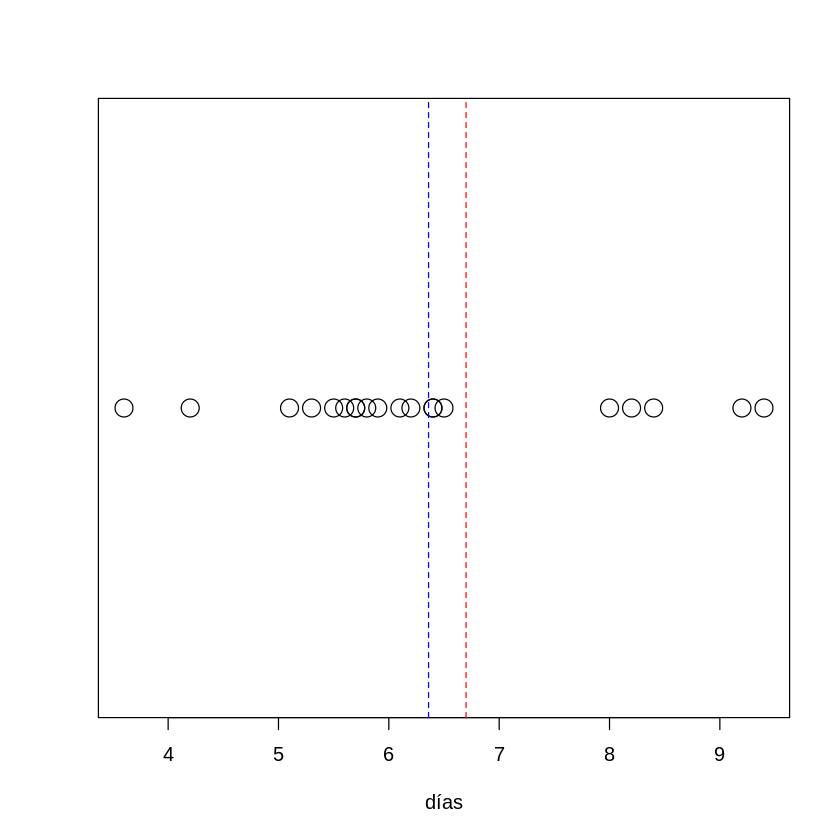

In [28]:
#::GMG::Puedo combinarlo con un stripchart
#par(fig=c(0,0.8,0,0.8))
#boxplot(x = tiempos, horizontal = TRUE, axes = FALSE)
#par(fig=c(0,0.8,0.55,1))
stripchart(x = tiempos, 
           xlab = 'días',
           xlim = c(min(tiempos$días),max(tiempos$días)),
           pch = 1, cex=2)
abline(v = mu, col = 'red', lty = 2)
abline(v = mean(tiempos$días), col = 'blue', lty = 2)

ii) Realiza un test de hipótesis para determinar si el producto es efectivo o no.

**::GMG::** Apuntes de estadística, 6.3 Contrastes de hipótesis, pp. 39-41

Test de hipótesis:

 1. Definimos: 
    - $\alpha$ = 0.05
    - $H_0$: $\mu$ = 6.7 (el tratamiento es efectivo)
    - $H_1$: $\mu \neq 6.7$ (el tratmiento no es efectivo)

 2. Calculamos el p-valor con los datos que tiempos.
 3. Comparamos $\alpha$ con el p.-valor

In [34]:
#::GMG::Hacemos el t-test
# https://stat.ethz.ch/R-manual/R-devel/library/stats/html/t.test.html
test <- t.test(x = tiempos$días, mu = mu, alternative = 'two.sided')
test


	One Sample t-test

data:  tiempos$días
t = -0.984, df = 19, p-value = 0.3375
alternative hypothesis: true mean is not equal to 6.7
95 percent confidence interval:
 5.636802 7.083198
sample estimates:
mean of x 
     6.36 


In [36]:
paste('Como el p-vaue es',round(test$p.value,2),'> 0.05, no rechazamos la hipótesis nula')

[1] "Como el p-vaue es 0.34 > 0.05, no rechazamos la hipótesis nula"

### Problema 2 

Se quiere estudiar el efecto del consumo prolongado de cannabis sobre el cerebro humano (ver [Yucel et al. 2008](https://www.ncbi.nlm.nih.gov/pubmed/18519827) ([+](https://www.google.com/search?client=firefox-b-ab&q=Yucel+et+al.+2008))). Para ello se reclutaron 15 fumadores de más de 10 años de antigüedad con un consumo igual o superior a 5 porros por día. Para el grupo control, se seleccionaron 16 no fumadores de edad y educación similar. Los datos del volumen de los hipocampos izquierdo y derecho medido en milímetros cúbicos para ambos grupos, figuran respectivamente en los archivos con cannabis.txt y sin cannabis.txt.

**::GMG::** Apuntes básicos de estadística (pdf) *Capítulo 7 Comparación de medias entre dos grupos* pp. 43-47 

**::GMG::** Leer con detenimiento el paper y ver sus representaciones gráficas

In [37]:
#::GMG::Primero cargo los datos
con.cannabis <- read.csv('con_cannabis.txt', header=TRUE, sep=' ')
sin.cannabis <- read.csv('sin_cannabis.txt', header=TRUE, sep=' ')

In [38]:
str(con.cannabis)

'data.frame':	15 obs. of  2 variables:
 $ izq: int  2350 2380 2500 2770 2820 2850 2860 2870 2900 3000 ...
 $ der: int  2520 2680 2690 2700 2720 2800 2820 3000 3080 3100 ...


In [39]:
str(sin.cannabis)

'data.frame':	16 obs. of  2 variables:
 $ izq: int  2050 2780 2900 2950 2980 3000 3150 3290 3320 3350 ...
 $ der: int  2380 2880 2900 3070 3130 3290 3320 3340 3420 3480 ...


i) Representa gráficamente los datos.

**::GMG::** Apuntes de estadística básica (pdf) *2.2. Representación gráfica*, pp. 8-9

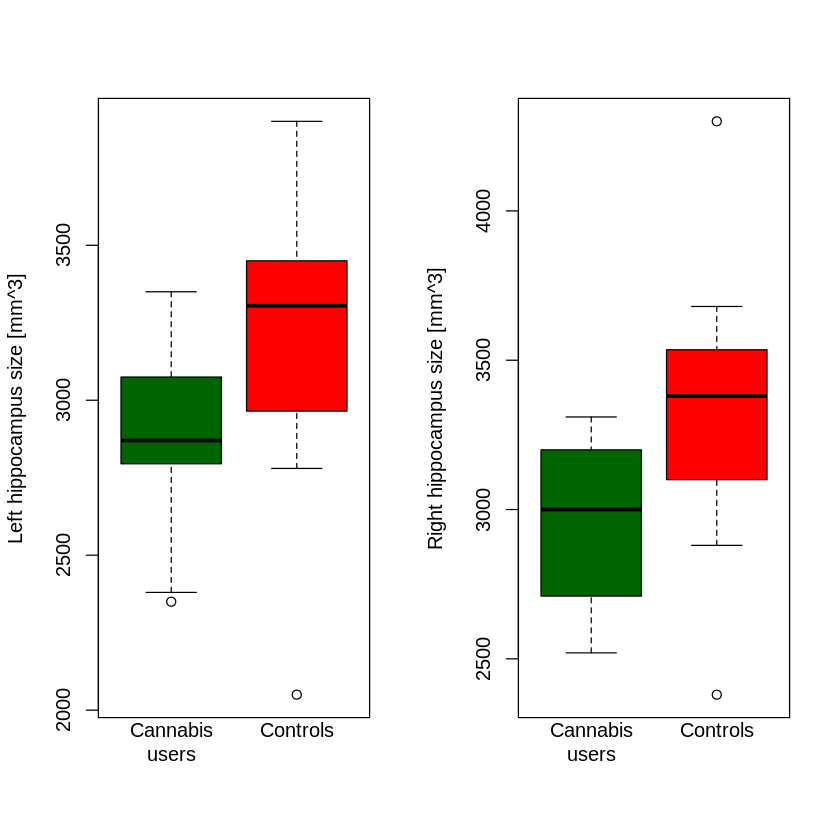

In [40]:
#::GMG::Represento los dos grupos de forma canónica con boxplots
# https://www.statmethods.net/graphs/boxplot.html
par(mfrow=c(1,2))
boxplot(con.cannabis$izq, sin.cannabis$izq, col=c('darkgreen', 'red'), 
        ylab='Left hippocampus size [mm^3]', xaxt='n')
axis(1, at=1:2, c('Cannabis\nusers', 'Controls\n'), tick=F)
boxplot(con.cannabis$der, sin.cannabis$der, col=c('darkgreen', 'red'), 
        ylab='Right hippocampus size [mm^3]', xaxt='n')
axis(1, at=1:2, c('Cannabis\nusers', 'Controls\n'), tick=F)

ii) Realiza un test de hipótesis para determinar si el consumo prolongado de cannabis afecta al volumen del hipocampo.